In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd

In [2]:
mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [3]:
def convert_to_date(x):
    return datetime.strptime(x, '%Y %m %d %H')

In [4]:
# airnow SAMS YEAR-2020
airnow_lacasa = pd.read_csv('X:\RA_AirQuality\Datasets\\airnow-la-casa\hourly\year-2020.csv')
airnow_lacasa.head()

,DateTime,CO(La Casa|AirNow),NO2(La Casa|AirNow),O3(La Casa|AirNow),PM10(La Casa|AirNow),PM2.5(La Casa|AirNow),SO2(La Casa|AirNow)
0,1/1/2020 1:00,1.1,48.0,1.0,32.4,NaN,1.0
1,1/1/2020 2:00,1.3,48.0,1.0,40.3,NaN,2.0
2,1/1/2020 3:00,1.2,46.0,0.0,36.5,NaN,2.0
3,1/1/2020 4:00,1.1,46.0,0.0,34.2,NaN,1.0
4,1/1/2020 5:00,0.9,NaN,0.0,31.7,NaN,1.0


In [5]:
airnow_lacasa = airnow_lacasa.rename(columns={"CO(La Casa|AirNow)":"CO","NO2(La Casa|AirNow)":"NO2","O3(La Casa|AirNow)":"O3","PM10(La Casa|AirNow)":"PM10","PM2.5(La Casa|AirNow)":"PM2.5","SO2(La Casa|AirNow)":"SO2"})

In [6]:
airnow_lacasa.describe()

,CO,NO2,O3,PM10,PM2.5,SO2
count,8218.000000,7803.000000,7241.000000,8284.000000,3358.000000,7851.000000
mean,0.247266,15.048187,26.965336,28.111673,12.219446,0.149662
std,0.201010,11.729072,17.200372,23.317957,12.032148,0.542129
min,0.000000,0.000000,0.000000,0.600000,0.100000,0.000000
25%,0.100000,6.000000,13.000000,13.600000,5.000000,0.000000
50%,0.200000,11.000000,28.000000,20.800000,8.500000,0.000000
75%,0.300000,22.000000,40.000000,33.500000,14.600000,0.000000
max,2.080000,70.000000,87.000000,347.400000,134.900000,12.000000


In [7]:
airnow_lacasa['DateTime'] = pd.to_datetime(airnow_lacasa.DateTime)
airnow_lacasa.tail()

,DateTime,CO,NO2,O3,PM10,PM2.5,SO2
8428,2020-12-31 21:00:00,0.34,23.0,27.0,45.6,14.6,1.0
8429,2020-12-31 22:00:00,0.32,24.0,25.0,37.6,11.6,0.0
8430,2020-12-31 23:00:00,0.35,NaN,18.0,30.8,12.0,0.0
8431,2021-01-01 00:00:00,0.39,NaN,8.0,37.3,16.9,1.0
8432,2021-01-01 01:00:00,0.40,36.0,8.0,37.2,15.5,0.0


In [8]:
airnow_lacasa_non_indexed = airnow_lacasa

In [9]:
airnow_lacasa = airnow_lacasa.set_index('DateTime')

In [10]:
airnow_lacasa.tail()

,CO,NO2,O3,PM10,PM2.5,SO2
DateTime,,,,,,
2020-12-31 21:00:00,0.34,23.0,27.0,45.6,14.6,1.0
2020-12-31 22:00:00,0.32,24.0,25.0,37.6,11.6,0.0
2020-12-31 23:00:00,0.35,NaN,18.0,30.8,12.0,0.0
2021-01-01 00:00:00,0.39,NaN,8.0,37.3,16.9,1.0
2021-01-01 01:00:00,0.40,36.0,8.0,37.2,15.5,0.0


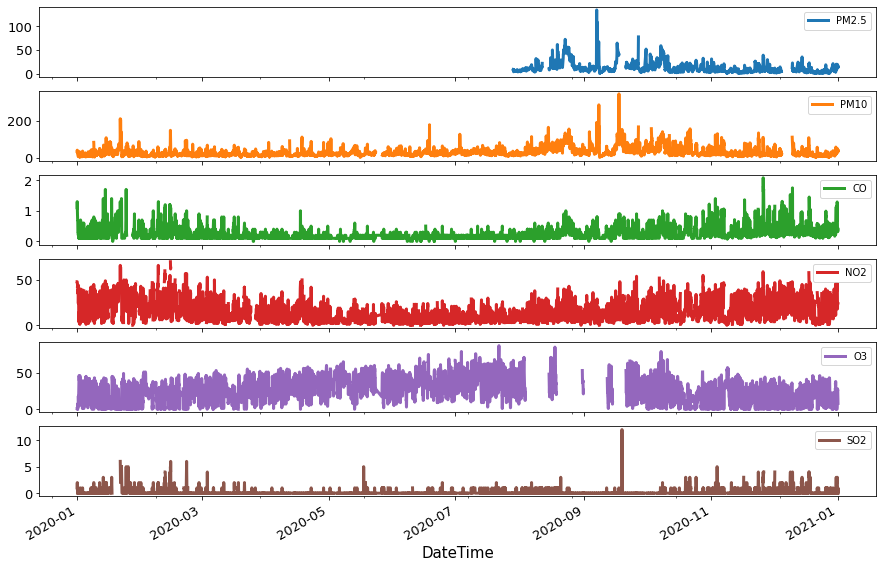

In [11]:
data_AQ_2020=airnow_lacasa[['PM2.5','PM10','CO','NO2','O3','SO2']]
data_AQ_2020.plot(figsize=(15,10), linewidth=3, fontsize=13, subplots=True)
plt.xlabel('DateTime', fontsize=15);